<a href="https://colab.research.google.com/github/SumathiGit/Natural-language-processing/blob/main/Transfer_Learning_Fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
torch.__version__

'1.8.1+cu101'

In [ ]:
bs = 64
#bs=16

In [ ]:
"""
Dataset =  Oxford-IIIT Pet Dataset by O. M. Parkhi et al., 2012 == > which features 12 cat breeds and 25 dogs breeds.
Our model will need to learn to differentiate between these 37 distinct categories.
According to their paper, the best accuracy they could get in 2012 was 59.21%.
"""

'\nDataset =  Oxford-IIIT Pet Dataset by O. M. Parkhi et al., 2012 == > which features 12 cat breeds and 25 dogs breeds.\nOur model will need to learn to differentiate between these 37 distinct categories.\nAccording to their paper, the best accuracy they could get in 2012 was 59.21%.\n'

In [ ]:
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
np.random.seed(2)
fnames = get_image_files(path_img)
fnames[0]

PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_94.jpg')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3503: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale

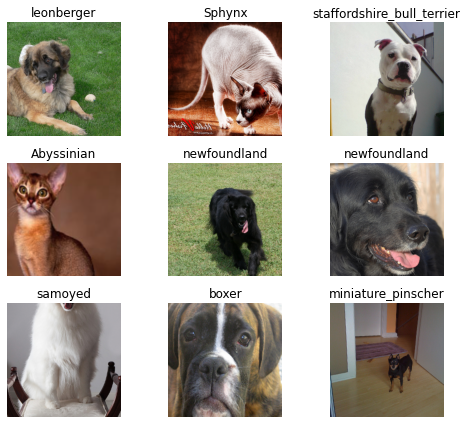

In [ ]:
pat = r'/([^/]+)_\d+.jpg$'                                         #Regex format for representing the saint_bernard_94.jpg' file  >> www.regexone.com for more detail
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))


#we have used ImageDataBunch Class to import the images.
#This is one of the strongest features on fastai,
#this class can automatically handle a lot of things without any configuration.

In [ ]:
#Training the dataset by using pretrained resnet34 residual neural network
#setting error_rate to metrix to calculate the accuracy

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)                        # fit_oe_cycle method == > https://iconof.com/1cycle-learning-rate-policy/

In [ ]:
"""
Above code o/p :

epoch	train_loss	valid_loss	error_rate	time
0	1.362610	0.294617	0.096752	01:50
1	0.630478	0.233491	0.081867	01:53
2	0.403119	0.190164	0.066306	01:54
3	0.277597	0.186624	0.066306	01:55
"""

In [ ]:
#The error rate of the last epoch was 0.06 which means that our model managed to classify 66% of the images right, noting that some images in the dataset are black images or random noisy images.

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [ ]:
"""
epoch	train_loss	valid_loss	error_rate	time
0	0.249241	0.175697	0.065629	01:56
1	0.226726	0.170365	0.059540	01:58
"""

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)         #ImagesClassification using fastai >> FasterAi
interp.most_confused(min_val=2)

In [ ]:
"""
[('Egyptian_Mau', 'Bengal', 5),
 ('american_bulldog', 'staffordshire_bull_terrier', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Birman', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Siamese', 'Birman', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Bengal', 'Egyptian_Mau', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'leonberger', 2),
 ('chihuahua', 'american_pit_bull_terrier', 2),
 ('english_setter', 'english_cocker_spaniel', 2)]
 """